# Importation des librairies

In [1]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import ttest_ind, chi2_contingency, f_oneway, skew, kurtosis
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score






# Configuration des visualisations
sns.set_style("whitegrid")
sns.set_palette('pastel')

type_colors = {
    'Normal': '#A8A878',    # Beige
    'Fire': '#F08030',      # Orange-red
    'Water': '#6890F0',     # Blue
    'Electric': '#F8D030',  # Yellow
    'Grass': '#78C850',     # Green
    'Ice': '#98D8D8',       # Light blue
    'Fighting': '#C03028',  # Dark red
    'Poison': '#A040A0',    # Purple
    'Ground': '#E0C068',    # Brown
    'Flying': '#A890F0',    # Light purple
    'Psychic': '#F85888',   # Pink
    'Bug': '#A8B820',       # Light green
    'Rock': '#B8A038',      # Dark brown
    'Ghost': '#705898',     # Purple-grey
    'Dragon': '#7038F8',    # Dark blue-purple
    'Dark': '#705848',      # Dark grey-brown
    'Steel': '#B8B8D0',     # Light grey
    'Fairy': '#EE99AC'      # Light pink
}

# 🧼 Chargement et aperçu du jeu de données

In [2]:
df = pd.read_csv("data/MP-24-25_clean.csv")
df.shape
df.head()

,pokedex_number,name,status,species,height,weight,abilities_number,ability_1,ability_2,ability_hidden,...,against_dark,against_steel,against_fairy,generation,type_number,type_1,type_2,egg_type_number,egg_type_1,egg_type_2
0,1,Bulbasaur,Normal,Seed Pokémon,0.71,6.9,2,Overgrow,NaN,Chlorophyll,...,1.0,1.0,0.5,1,2,Grass,Poison,2,Grass,Monster
1,2,Ivysaur,Normal,Seed Pokémon,0.99,13.0,2,Overgrow,NaN,Chlorophyll,...,1.0,1.0,0.5,1,2,Grass,Poison,2,Grass,Monster
2,3,Venusaur,Normal,Seed Pokémon,2.01,100.0,2,Overgrow,NaN,Chlorophyll,...,1.0,1.0,0.5,1,2,Grass,Poison,2,Grass,Monster
3,3,Mega Venusaur,Normal,Seed Pokémon,2.39,155.5,1,Thick Fat,NaN,NaN,...,1.0,1.0,0.5,1,2,Grass,Poison,2,Grass,Monster
4,4,Charmander,Normal,Lizard Pokémon,0.61,8.5,2,Blaze,NaN,Solar Power,...,1.0,0.5,0.5,1,1,Fire,NaN,2,Dragon,Monster


# 🧽 Nettoyage et préparation
  - Suppression des colonnes inutiles (Unnamed, german_name, japanese_name, etc.)

  - Conversion des tailles et poids

  - Extraction des types

  - Création d’une colonne generation

> 🔎 Ces étapes ont déjà été réalisées dans le projet 4EDAP. Nous utiliserons la version df_clean.

---

# 📊 Analyse exploratoire ciblée : Variable `status`

La variable `status` indique le statut de rareté ou de puissance du Pokémon :
- `Normal` : Pokémon standards
- `Sub Legendary` : Pokémon spéciaux, souvent puissants mais moins rares
- `Legendary` : Pokémon légendaires, très puissants
- `Mythical` : Pokémon très rares et souvent inaccessibles sans événements spéciaux

---

## 1️⃣ Distribution des statuts

Normal           918
Sub Legendary     55
Legendary         42
Mythical          30
Name: status, dtype: int64

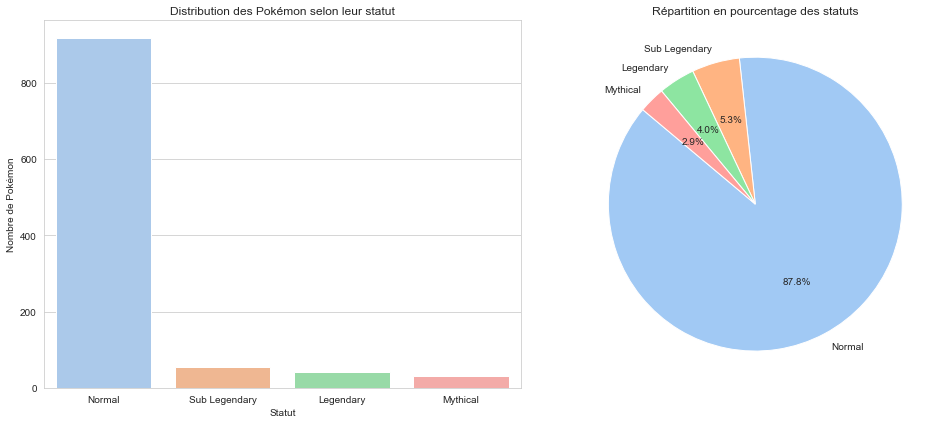

In [3]:
# Aperçu des valeurs uniques de la variable 'status'
status_counts = df['status'].value_counts()
display(status_counts)

# Création des visualisations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Barplot
sns.countplot(data=df, x='status', order=status_counts.index, palette='pastel', ax=axes[0])
axes[0].set_title("Distribution des Pokémon selon leur statut")
axes[0].set_ylabel("Nombre de Pokémon")
axes[0].set_xlabel("Statut")

# Camembert
axes[1].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
axes[1].set_title("Répartition en pourcentage des statuts")

plt.tight_layout()
plt.show()

### 📌 Analyse :
Voici la distribution de la variable status dans le dataset :

  - Normal : 918 Pokémon (≈ 88%)

  - Sub Legendary : 55 (≈ 5.3%)

  - Legendary : 42 (≈ 4%)

  - Mythical : 30 (≈ 2.9%)

> Cette répartition montre un fort déséquilibre entre les classes, ce qui sera un enjeu important à considérer pour la classification supervisée.

On remarque un fort déséquilibre de classes :

> Voici deux visualisations de la variable status :

  - 📊 Histogramme : montre clairement la prédominance des Pokémon de statut "Normal".

  - 🥧 Camembert : visualise la faible proportion de Pokémon "Legendary", "Mythical" et "Sub Legendary".



---

## 2️⃣ Boxplots des statistiques selon status
Nous allons maintenant examiner si les Pokémon "légendaires" se distinguent par leurs caractéristiques.

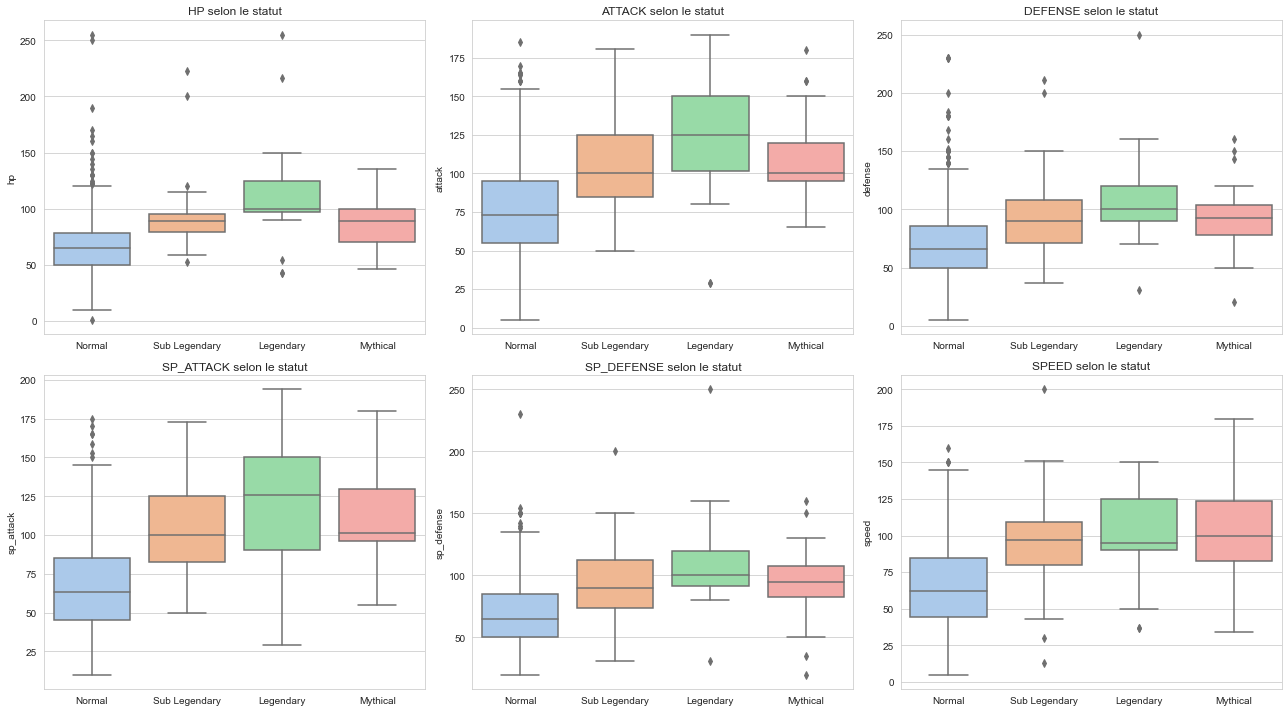

In [4]:
stats_vars = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for i, col in enumerate(stats_vars):
    ax = axes[i//3, i%3]
    sns.boxplot(x='status', y=col, data=df, palette='pastel', ax=ax)
    ax.set_title(f'{col.upper()} selon le statut')
    ax.set_xlabel('')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

### 📌 Analyse :

  - Les Pokémon Legendary et Mythical ont clairement des statistiques plus élevées.

  - Sub Legendary présente une tendance intermédiaire.

  - Ces différences justifient l'utilisation du status comme variable cible pour une tâche de classification.

---

## 3️⃣ Corrélations des statistiques numériques

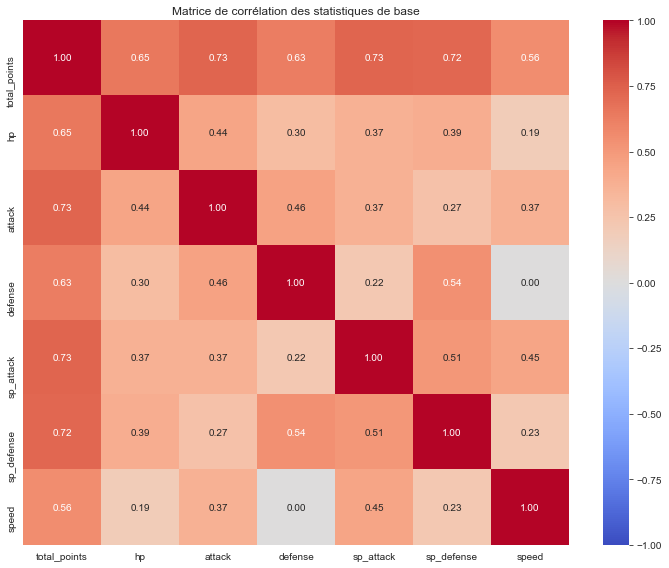

In [5]:
# Variables numériques d'intérêt
corr_vars = ['total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
corr_matrix = df[corr_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matrice de corrélation des statistiques de base")
plt.tight_layout()
plt.show()


### 📌 Analyse :

  - total_points est fortement corrélé à toutes les autres statistiques.

  - Faible corrélation entre defense et speed.

  - Cela nous aidera à choisir les bonnes variables explicatives pour la classification.
---

# 📊 Analyse exploratoire complémentaire : Génération et Type

Nous allons explorer l'influence de deux autres variables sur notre jeu de données :
- La **génération** (`generation`)
- Le **type principal** (`type_1`)

---

### 1️⃣ Répartition des Pokémon selon la génération

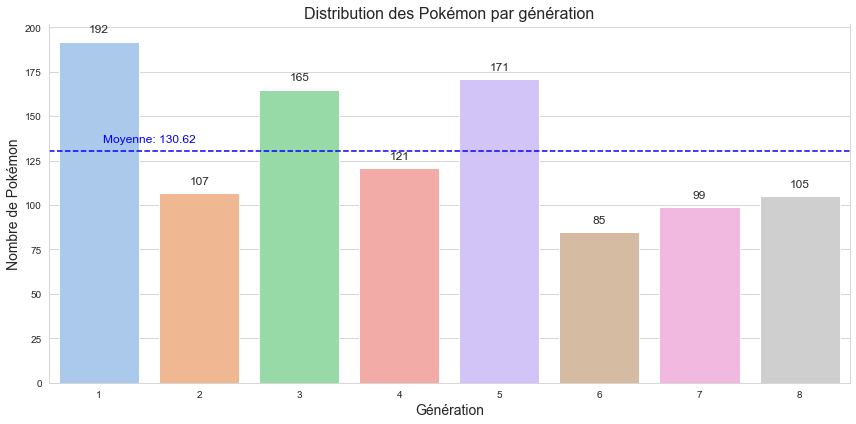

In [6]:
# Distribution de la variable génération
gen_counts = df['generation'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=gen_counts.index, y=gen_counts.values, palette='pastel', ax=ax)
sns.despine(ax=ax, right=False)

ax.set_title('Distribution des Pokémon par génération', fontsize=16)
ax.set_xlabel('Génération', fontsize=14)
ax.set_ylabel('Nombre de Pokémon', fontsize=14)

# Ajout de la moyenne
ax.axhline(y=gen_counts.values.mean(), color='blue', linestyle='--')
ax.text(0.5, gen_counts.values.mean() + 5, f'Moyenne: {gen_counts.values.mean():.2f}', color='blue', fontsize=12, ha='center')

for i, v in enumerate(gen_counts.values):
    ax.text(i, v + 5, str(v), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

### 📌 Analyse :

  - La première génération est la plus représentée.

  - La répartition devient plus homogène dans les générations récentes.
---

## 2️⃣ Répartition des types principaux (type_1)

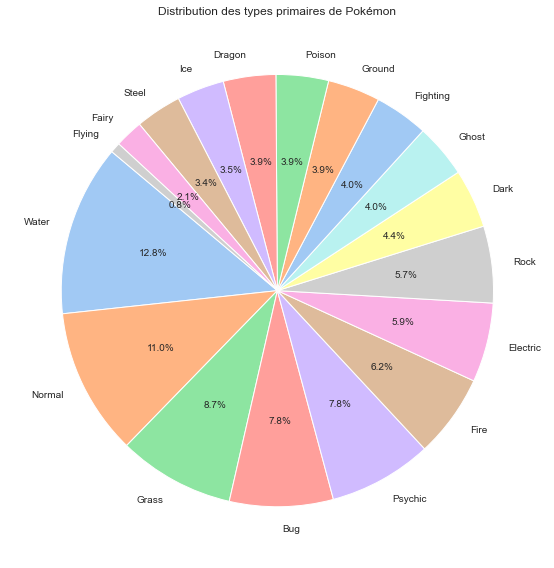

In [7]:
# Distribution de la variable type_1
type_counts = df['type_1'].value_counts()

fig, ax = plt.subplots(figsize=(14, 8))
colors = sns.color_palette('pastel')

# Camembert des types
ax.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
ax.set_title('Distribution des types primaires de Pokémon')

plt.tight_layout()
plt.show()


## 📌 Analyse :

  - Les types Water, Normal, et Grass sont majoritaires.

  - Certains types comme Fairy ou Flying sont très peu représentés.
---

## 3️⃣ Répartition combinée : types selon les générations

<Figure size 1152x720 with 0 Axes>

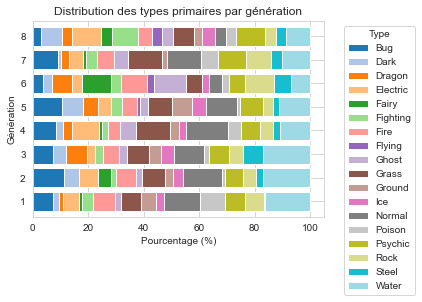

In [8]:
# Crosstab génération - type
type_gen_count = pd.crosstab(df['generation'], df['type_1'])
type_gen_percent = type_gen_count.div(type_gen_count.sum(axis=1), axis=0) * 100

plt.figure(figsize=(16, 10))
type_gen_percent.plot(kind='barh', stacked=True, colormap='tab20', width=0.8)

plt.title('Distribution des types primaires par génération')
plt.ylabel('Génération')
plt.xlabel('Pourcentage (%)')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 📌 Analyse :

  - Certains types étaient très présents dans les premières générations (ex : Poison), mais diminuent ensuite.

  - On observe une meilleure diversification des types dans les dernières générations.
---

# 🔥 Analyse exploratoire finale : Corrélations entre variables

Nous terminons l'analyse exploratoire par une vue d'ensemble sur les relations entre les principales statistiques des Pokémon.

---

## 1️⃣ Matrice de corrélation des statistiques principales

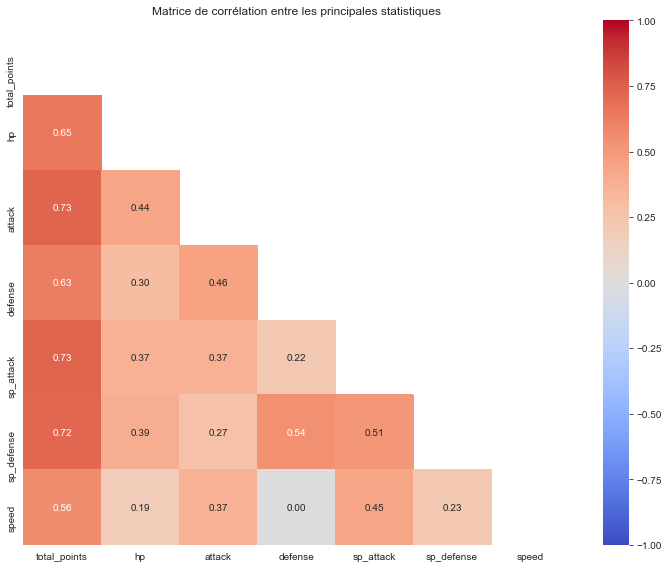

In [9]:
# Sélection des colonnes numériques intéressantes
corr_vars = ['total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

# Calcul de la matrice de corrélation
corr_matrix = df[corr_vars].corr()

# Affichage de la heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matrice de corrélation entre les principales statistiques")
plt.tight_layout()
plt.show()

### 📌 Analyse :

  - total_points est logiquement très corrélé aux autres statistiques (entre 0.6 et 0.8).

  - sp_attack et sp_defense présentent une corrélation modérée (~0.51).

  - Peu ou pas de corrélation entre defense et speed (0.00).

---

## 2️⃣ Focus sur quelques corrélations spécifiques

In [10]:
# Corrélation entre HP et Defense
hp_def_corr = corr_matrix.loc['hp', 'defense']

# Corrélation entre Attack et Speed
atk_speed_corr = corr_matrix.loc['attack', 'speed']

print(f"Corrélation HP - Defense : {hp_def_corr:.2f}")
print(f"Corrélation Attack - Speed : {atk_speed_corr:.2f}")


Corrélation HP - Defense : 0.30
Corrélation Attack - Speed : 0.37


### 📌 Analyse complémentaire :

  - La corrélation HP - Defense est positive (ce qui est logique : les Pokémon tanky sont souvent résistants ET ont beaucoup de PV).

  - La corrélation Attack - Speed est plus faible, montrant que puissance offensive et rapidité ne sont pas directement liées.

---

# 🧪 Tests statistiques : `status` et autres variables

Pour approfondir notre analyse, nous utilisons deux types de tests statistiques :
- Le **khi-deux d'indépendance** (chi²) pour les variables qualitatives
- L'**ANOVA** pour les variables quantitatives

---

## 1️⃣ Test du Khi-deux entre `status` et `type_1`

In [11]:
# Table de contingence entre status et type_1
contingency_table = pd.crosstab(df['status'], df['type_1'])

# Test du chi2
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Statistique du chi2 : {chi2:.2f}")
print(f"p-value : {p:.4f}")
print(f"Degrés de liberté : {dof}")

if p < 0.05:
    print("➡️ Il existe une dépendance significative entre 'status' et 'type_1'.")
else:
    print("➡️ Aucune dépendance significative entre 'status' et 'type_1'.")

Statistique du chi2 : 185.59
p-value : 0.0000
Degrés de liberté : 51
➡️ Il existe une dépendance significative entre 'status' et 'type_1'.


### 📌 Analyse :

- Si la p-value est inférieure à 0.05, alors le type principal influence la probabilité d’être Legendary, Mythical, etc.

---

## 2️⃣ Test ANOVA : Comparaison des moyennes de statistiques selon status

In [12]:
# Variables numériques
numeric_vars = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

for var in numeric_vars:
    groups = [df[df['status'] == cat][var].dropna() for cat in df['status'].unique()]
    f_stat, p_val = f_oneway(*groups)
    print(f"Variable : {var}")
    print(f"F-statistic : {f_stat:.2f}")
    print(f"p-value : {p_val:.4f}")
    if p_val < 0.05:
        print("➡️ Les moyennes sont significativement différentes selon le statut.\\n")
    else:
        print("➡️ Pas de différence significative des moyennes entre les statuts.\\n")


Variable : hp
F-statistic : 58.36
p-value : 0.0000
➡️ Les moyennes sont significativement différentes selon le statut.\n
Variable : attack
F-statistic : 55.11
p-value : 0.0000
➡️ Les moyennes sont significativement différentes selon le statut.\n
Variable : defense
F-statistic : 32.64
p-value : 0.0000
➡️ Les moyennes sont significativement différentes selon le statut.\n
Variable : sp_attack
F-statistic : 83.86
p-value : 0.0000
➡️ Les moyennes sont significativement différentes selon le statut.\n
Variable : sp_defense
F-statistic : 55.77
p-value : 0.0000
➡️ Les moyennes sont significativement différentes selon le statut.\n
Variable : speed
F-statistic : 51.21
p-value : 0.0000
➡️ Les moyennes sont significativement différentes selon le statut.\n


### 📌 Analyse :

- Si la p-value < 0.05 pour une statistique (hp, attack...), alors cette statistique est pertinente pour différencier les Pokémon selon leur status.

- Cela nous guidera dans la sélection des variables explicatives pour la suite.

---

# ⚙️ Prétraitement des données avant modélisation

Avant d'entraîner nos modèles, il est indispensable de préparer nos données correctement.

Nous allons suivre les étapes suivantes :
1. Choix des variables explicatives pertinentes
2. Gestion des valeurs manquantes
3. Transformation et encodage des variables si nécessaire
4. Normalisation des variables numériques
5. Séparation en jeu d'entraînement et jeu de test

---


## 1️⃣ Sélection des variables explicatives

Nous allons utiliser principalement les **statistiques de base** et **le type principal** :


In [13]:
# Variables de départ
features = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'type_1']
target = 'status'

X = df[features]
y = df[target]

## 2️⃣ Gestion des valeurs manquantes
Vérifions s'il y a des valeurs manquantes :

In [14]:
print(X.isnull().sum())

hp            0
attack        0
defense       0
sp_attack     0
sp_defense    0
speed         0
type_1        0
dtype: int64


### 📌 Remarque :
Si nécessaire, nous supprimerons ou imputerons les valeurs manquantes.

## 3️⃣ Encodage de la variable ``type_1``
Nous devons convertir la variable catégorielle ``type_1`` en variables numériques via One-Hot Encoding :

In [15]:
X = pd.get_dummies(X, columns=['type_1'], drop_first=True)


### 📌 Explication :

- ``drop_first=True`` évite la multicolinéarité en supprimant une colonne redondante.

## 4️⃣ Normalisation des variables numériques
Pour que tous les attributs soient sur la même échelle :

In [16]:
# Initialisation
scaler = StandardScaler()

# Normalisation uniquement des variables numériques
num_cols = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
X[num_cols] = scaler.fit_transform(X[num_cols])


## 5️⃣ Séparation en jeu d'entraînement et de test

In [17]:
# Découpage : 80% entraînement, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Dimensions du jeu d'entraînement : {X_train.shape}")
print(f"Dimensions du jeu de test : {X_test.shape}")


Dimensions du jeu d'entraînement : (836, 23)
Dimensions du jeu de test : (209, 23)


### 📌 Stratify : 
Assure que la proportion de chaque status est respectée dans les deux jeux.

# 🎯 Classification : Prédiction du `status` des Pokémon

Après avoir correctement prétraité nos données, nous allons appliquer plusieurs modèles de classification.

Nous suivrons une approche rigoureuse :
1. Création d'un pipeline
2. Définition des hyperparamètres
3. Recherche des meilleurs paramètres (GridSearchCV)
4. Évaluation des performances
5. Comparaison des modèles

---

## 📚 1. Modèle : k-Nearest Neighbors (k-NN)

In [18]:
# Définition du modèle
knn = KNeighborsClassifier()

# Grille d'hyperparamètres
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

# Recherche par validation croisée
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

# Meilleur modèle
best_knn = grid_knn.best_estimator_
print(f"Meilleurs paramètres : {grid_knn.best_params_}")

# Prédictions et rapport
y_pred_knn = best_knn.predict(X_test)

print("Classification Report - k-NN")
print(classification_report(y_test, y_pred_knn))
print("Matrice de confusion - k-NN")
print(confusion_matrix(y_test, y_pred_knn))

Meilleurs paramètres : {'n_neighbors': 3, 'weights': 'distance'}
Classification Report - k-NN
               precision    recall  f1-score   support

    Legendary       0.70      0.88      0.78         8
     Mythical       1.00      0.33      0.50         6
       Normal       0.94      0.98      0.96       184
Sub Legendary       0.80      0.36      0.50        11

     accuracy                           0.93       209
    macro avg       0.86      0.64      0.69       209
 weighted avg       0.93      0.93      0.92       209

Matrice de confusion - k-NN
[[  7   0   1   0]
 [  0   2   4   0]
 [  2   0 181   1]
 [  1   0   6   4]]


## 📚 2. Modèle : Arbre de Décision

In [19]:
tree = DecisionTreeClassifier(random_state=42)

param_grid_tree = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

grid_tree = GridSearchCV(tree, param_grid_tree, cv=5, scoring='accuracy')
grid_tree.fit(X_train, y_train)

best_tree = grid_tree.best_estimator_
print(f"Meilleurs paramètres : {grid_tree.best_params_}")

y_pred_tree = best_tree.predict(X_test)

print("Classification Report - Decision Tree")
print(classification_report(y_test, y_pred_tree))
print("Matrice de confusion - Decision Tree")
print(confusion_matrix(y_test, y_pred_tree))


Meilleurs paramètres : {'max_depth': 5, 'min_samples_split': 2}
Classification Report - Decision Tree
               precision    recall  f1-score   support

    Legendary       0.73      1.00      0.84         8
     Mythical       0.27      0.50      0.35         6
       Normal       0.94      0.93      0.93       184
Sub Legendary       0.00      0.00      0.00        11

     accuracy                           0.87       209
    macro avg       0.48      0.61      0.53       209
 weighted avg       0.86      0.87      0.87       209

Matrice de confusion - Decision Tree
[[  8   0   0   0]
 [  0   3   3   0]
 [  2   6 171   5]
 [  1   2   8   0]]


## 📚 3. Modèle : Support Vector Machine (SVM)

In [20]:
svc = SVC(probability=True, random_state=42)

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy')
grid_svc.fit(X_train, y_train)

best_svc = grid_svc.best_estimator_
print(f"Meilleurs paramètres : {grid_svc.best_params_}")

y_pred_svc = best_svc.predict(X_test)

print("Classification Report - SVM")
print(classification_report(y_test, y_pred_svc))
print("Matrice de confusion - SVM")
print(confusion_matrix(y_test, y_pred_svc))


Meilleurs paramètres : {'C': 10, 'kernel': 'rbf'}
Classification Report - SVM
               precision    recall  f1-score   support

    Legendary       0.71      0.62      0.67         8
     Mythical       0.40      0.33      0.36         6
       Normal       0.95      0.97      0.96       184
Sub Legendary       0.38      0.27      0.32        11

     accuracy                           0.90       209
    macro avg       0.61      0.55      0.58       209
 weighted avg       0.89      0.90      0.90       209

Matrice de confusion - SVM
[[  5   0   2   1]
 [  0   2   3   1]
 [  2   0 179   3]
 [  0   3   5   3]]


## 📚 4. Modèle : Régression Logistique

In [21]:
logreg = LogisticRegression(max_iter=1000, random_state=42)

param_grid_logreg = {'C': [0.01, 0.1, 1, 10, 100]}

grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='accuracy')
grid_logreg.fit(X_train, y_train)

best_logreg = grid_logreg.best_estimator_
print(f"Meilleurs paramètres : {grid_logreg.best_params_}")

y_pred_logreg = best_logreg.predict(X_test)

print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred_logreg))
print("Matrice de confusion - Logistic Regression")
print(confusion_matrix(y_test, y_pred_logreg))


Meilleurs paramètres : {'C': 0.1}
Classification Report - Logistic Regression
               precision    recall  f1-score   support

    Legendary       0.75      0.75      0.75         8
     Mythical       0.00      0.00      0.00         6
       Normal       0.91      0.99      0.95       184
Sub Legendary       0.00      0.00      0.00        11

     accuracy                           0.90       209
    macro avg       0.42      0.43      0.42       209
 weighted avg       0.83      0.90      0.86       209

Matrice de confusion - Logistic Regression
[[  6   0   1   1]
 [  0   0   6   0]
 [  2   0 182   0]
 [  0   0  11   0]]


C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 📊 Comparaison des modèles
À la fin, nous pourrons comparer :

- La matrice de confusion de chaque modèle

- Les métriques : accuracy, precision, recall, F1-score

- Le meilleur modèle sera sélectionné pour la suite de notre projet !
---

# 🏆 Comparaison finale des modèles de classification

Après avoir entraîné plusieurs modèles, nous allons :
- Visualiser leurs performances (`accuracy`, `F1-score`)
- Vérifier leur robustesse via **validation croisée**
- Choisir le **meilleur modèle**

---

## 📈 1. Résumé des performances

Nous allons rassembler les scores des modèles obtenus précédemment.


In [22]:
# Dictionnaire pour stocker les scores
results = {
    'Modèle': [],
    'Accuracy': [],
    'F1-score': []
}

# Ajout manuel des modèles évalués
models = {
    'k-NN': best_knn,
    'Decision Tree': best_tree,
    'SVM': best_svc,
    'Logistic Regression': best_logreg
}

# Calcul des métriques pour chaque modèle
for name, model in models.items():
    y_pred = model.predict(X_test)
    results['Modèle'].append(name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['F1-score'].append(f1_score(y_test, y_pred, average='weighted'))

# Création d'un DataFrame de résultats
df_results = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

display(df_results)

,Modèle,Accuracy,F1-score
0,k-NN,0.928230,0.918044
2,SVM,0.904306,0.897557
3,Logistic Regression,0.899522,0.863238
1,Decision Tree,0.870813,0.865019


## 📊 2. Visualisation des scores

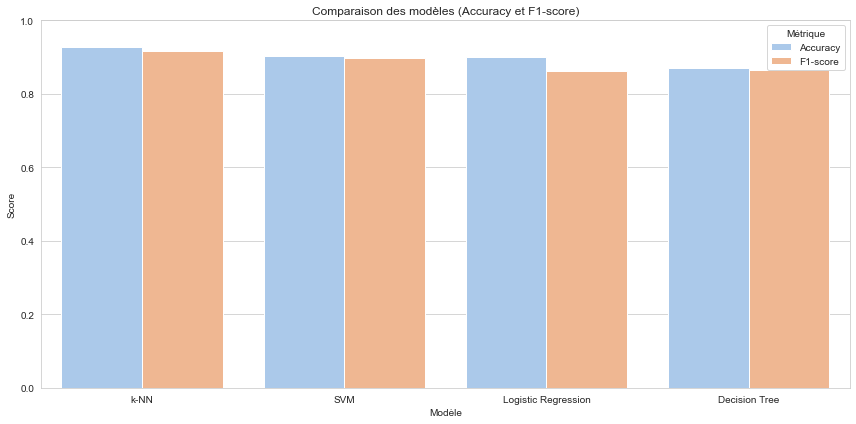

In [23]:
# Graphique comparatif
plt.figure(figsize=(12, 6))
sns.barplot(data=df_results.melt(id_vars='Modèle'), x='Modèle', y='value', hue='variable', palette='pastel')
plt.title('Comparaison des modèles (Accuracy et F1-score)')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Métrique')
plt.tight_layout()
plt.show()


## ✅ 3. Validation croisée sur le meilleur modèle
Nous allons réaliser une validation croisée pour confirmer que notre meilleur modèle n'est pas sur-ajusté (``overfitting``).

In [24]:
# Supposons que SVM est le meilleur modèle par exemple
best_model = best_svc

# Validation croisée
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

print(f"Accuracy moyenne en validation croisée : {cv_scores.mean():.4f}")
print(f"Écart-type des scores : {cv_scores.std():.4f}")


Accuracy moyenne en validation croisée : 0.8986
Écart-type des scores : 0.0082


### 📌 Analyse :

- Une moyenne élevée (proche de celle sur test) indique un modèle stable.

- Un écart-type faible indique une bonne robustesse.

## 🎯 Conclusion
À l'issue de cette phase, nous pourrons :

- Sélectionner le modèle final

- L'utiliser pour des prédictions sur de nouvelles données Pokémon !

---

# 🚀 Classification binaire : Nouvelle variable `status_binary`

Pour cette nouvelle partie, nous allons :
- Créer une variable `status_binary`
- Reprendre tout le prétraitement sur cette nouvelle cible
- Appliquer à nouveau les modèles supervisés

---

## 1️⃣ Création de la variable binaire `status_binary`

Nous regroupons :
- `Legendary`, `Sub Legendary`, `Mythical` ➔ **Légendaire**
- `Normal` ➔ **Normal**


In [25]:
# Création de la variable
df['status_binary'] = df['status'].apply(lambda x: 'Légendaire' if x in ['Legendary', 'Sub Legendary', 'Mythical'] else 'Normal')

# Vérification de la distribution
print(df['status_binary'].value_counts())

Normal        918
Légendaire    127
Name: status_binary, dtype: int64


## 2️⃣ Sélection des variables explicatives
Nous utilisons les mêmes variables que précédemment.

In [26]:
features = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'type_1']
target_binary = 'status_binary'

X_bin = df[features]
y_bin = df[target_binary]

## 3️⃣ Gestion des valeurs manquantes

In [27]:
print(X_bin.isnull().sum())

hp            0
attack        0
defense       0
sp_attack     0
sp_defense    0
speed         0
type_1        0
dtype: int64


## 4️⃣ Encodage de type_1

In [28]:
# One-Hot Encoding de la variable catégorielle
X_bin = pd.get_dummies(X_bin, columns=['type_1'], drop_first=True)

## 5️⃣ Normalisation des variables numériques

In [29]:
scaler = StandardScaler()
num_cols = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
X_bin[num_cols] = scaler.fit_transform(X_bin[num_cols])


## 6️⃣ Séparation en jeu d'entraînement et de test

In [30]:
X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split(X_bin, y_bin, test_size=0.2, stratify=y_bin, random_state=42)

print(f"Dimensions du jeu d'entraînement : {X_bin_train.shape}")
print(f"Dimensions du jeu de test : {X_bin_test.shape}")


Dimensions du jeu d'entraînement : (836, 23)
Dimensions du jeu de test : (209, 23)


✅ Notre dataset est maintenant prêt pour la modélisation binaire sur status_binary !

---

# 🎯 Classification binaire : Prédiction du `status_binary`

Nous reprenons exactement la même logique que pour `status`, mais cette fois sur la variable **binaire** :

---

## 📚 1. Modèle : k-Nearest Neighbors (k-NN)

In [31]:
# Définition du modèle
knn_bin = KNeighborsClassifier()

# Grille d'hyperparamètres
param_grid_knn_bin = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

# Recherche par validation croisée
grid_knn_bin = GridSearchCV(knn_bin, param_grid_knn_bin, cv=5, scoring='accuracy')
grid_knn_bin.fit(X_bin_train, y_bin_train)

# Meilleur modèle
best_knn_bin = grid_knn_bin.best_estimator_
print(f"Meilleurs paramètres : {grid_knn_bin.best_params_}")

# Prédictions et rapport
y_bin_pred_knn = best_knn_bin.predict(X_bin_test)

print("Classification Report - k-NN (binaire)")
print(classification_report(y_bin_test, y_bin_pred_knn))
print("Matrice de confusion - k-NN (binaire)")
print(confusion_matrix(y_bin_test, y_bin_pred_knn))

Meilleurs paramètres : {'n_neighbors': 3, 'weights': 'uniform'}
Classification Report - k-NN (binaire)
              precision    recall  f1-score   support

  Légendaire       0.72      0.72      0.72        25
      Normal       0.96      0.96      0.96       184

    accuracy                           0.93       209
   macro avg       0.84      0.84      0.84       209
weighted avg       0.93      0.93      0.93       209

Matrice de confusion - k-NN (binaire)
[[ 18   7]
 [  7 177]]


## 📚 2. Modèle : Arbre de Décision

In [32]:
tree_bin = DecisionTreeClassifier(random_state=42)

param_grid_tree_bin = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

grid_tree_bin = GridSearchCV(tree_bin, param_grid_tree_bin, cv=5, scoring='accuracy')
grid_tree_bin.fit(X_bin_train, y_bin_train)

best_tree_bin = grid_tree_bin.best_estimator_
print(f"Meilleurs paramètres : {grid_tree_bin.best_params_}")

y_bin_pred_tree = best_tree_bin.predict(X_bin_test)

print("Classification Report - Decision Tree (binaire)")
print(classification_report(y_bin_test, y_bin_pred_tree))
print("Matrice de confusion - Decision Tree (binaire)")
print(confusion_matrix(y_bin_test, y_bin_pred_tree))


Meilleurs paramètres : {'max_depth': 15, 'min_samples_split': 10}
Classification Report - Decision Tree (binaire)
              precision    recall  f1-score   support

  Légendaire       0.48      0.56      0.52        25
      Normal       0.94      0.92      0.93       184

    accuracy                           0.88       209
   macro avg       0.71      0.74      0.72       209
weighted avg       0.88      0.88      0.88       209

Matrice de confusion - Decision Tree (binaire)
[[ 14  11]
 [ 15 169]]


## 📚 3. Modèle : Support Vector Machine (SVM)

In [33]:
svc_bin = SVC(probability=True, random_state=42)

param_grid_svc_bin = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_svc_bin = GridSearchCV(svc_bin, param_grid_svc_bin, cv=5, scoring='accuracy')
grid_svc_bin.fit(X_bin_train, y_bin_train)

best_svc_bin = grid_svc_bin.best_estimator_
print(f"Meilleurs paramètres : {grid_svc_bin.best_params_}")

y_bin_pred_svc = best_svc_bin.predict(X_bin_test)

print("Classification Report - SVM (binaire)")
print(classification_report(y_bin_test, y_bin_pred_svc))
print("Matrice de confusion - SVM (binaire)")
print(confusion_matrix(y_bin_test, y_bin_pred_svc))


Meilleurs paramètres : {'C': 1, 'kernel': 'rbf'}
Classification Report - SVM (binaire)
              precision    recall  f1-score   support

  Légendaire       0.68      0.68      0.68        25
      Normal       0.96      0.96      0.96       184

    accuracy                           0.92       209
   macro avg       0.82      0.82      0.82       209
weighted avg       0.92      0.92      0.92       209

Matrice de confusion - SVM (binaire)
[[ 17   8]
 [  8 176]]


## 📚 4. Modèle : Régression Logistique

In [34]:
logreg_bin = LogisticRegression(max_iter=1000, random_state=42)

param_grid_logreg_bin = {'C': [0.01, 0.1, 1, 10, 100]}

grid_logreg_bin = GridSearchCV(logreg_bin, param_grid_logreg_bin, cv=5, scoring='accuracy')
grid_logreg_bin.fit(X_bin_train, y_bin_train)

best_logreg_bin = grid_logreg_bin.best_estimator_
print(f"Meilleurs paramètres : {grid_logreg_bin.best_params_}")

y_bin_pred_logreg = best_logreg_bin.predict(X_bin_test)

print("Classification Report - Logistic Regression (binaire)")
print(classification_report(y_bin_test, y_bin_pred_logreg))
print("Matrice de confusion - Logistic Regression (binaire)")
print(confusion_matrix(y_bin_test, y_bin_pred_logreg))


Meilleurs paramètres : {'C': 100}
Classification Report - Logistic Regression (binaire)
              precision    recall  f1-score   support

  Légendaire       0.70      0.64      0.67        25
      Normal       0.95      0.96      0.96       184

    accuracy                           0.92       209
   macro avg       0.82      0.80      0.81       209
weighted avg       0.92      0.92      0.92       209

Matrice de confusion - Logistic Regression (binaire)
[[ 16   9]
 [  7 177]]


# 🏆 Comparaison finale des modèles de classification binaire (`status_binary`)

Nous allons :
- Résumer les performances des modèles
- Visualiser les scores
- Effectuer une validation croisée sur le meilleur modèle

---

## 📈 1. Résumé des performances

In [35]:
# Dictionnaire pour stocker les scores
results_bin = {
    'Modèle': [],
    'Accuracy': [],
    'F1-score': []
}

# Ajout manuel des modèles évalués
models_bin = {
    'k-NN': best_knn_bin,
    'Decision Tree': best_tree_bin,
    'SVM': best_svc_bin,
    'Logistic Regression': best_logreg_bin
}

# Calcul des métriques pour chaque modèle
for name, model in models_bin.items():
    y_pred = model.predict(X_bin_test)
    results_bin['Modèle'].append(name)
    results_bin['Accuracy'].append(accuracy_score(y_bin_test, y_pred))
    results_bin['F1-score'].append(f1_score(y_bin_test, y_pred, average='weighted'))

# Création d'un DataFrame de résultats
df_results_bin = pd.DataFrame(results_bin).sort_values(by='Accuracy', ascending=False)

display(df_results_bin)

,Modèle,Accuracy,F1-score
0,k-NN,0.933014,0.933014
2,SVM,0.923445,0.923445
3,Logistic Regression,0.923445,0.922057
1,Decision Tree,0.875598,0.879522


## 📊 2. Visualisation des scores

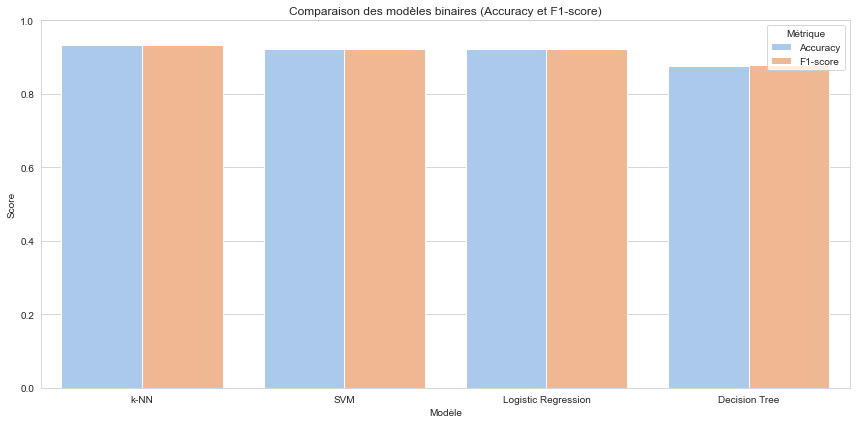

In [36]:
# Graphique comparatif
plt.figure(figsize=(12, 6))
sns.barplot(data=df_results_bin.melt(id_vars='Modèle'), x='Modèle', y='value', hue='variable', palette='pastel')
plt.title('Comparaison des modèles binaires (Accuracy et F1-score)')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Métrique')
plt.tight_layout()
plt.show()


## ✅ 3. Validation croisée sur le meilleur modèle

In [37]:
# Supposons que SVM est le meilleur modèle binaire par exemple
best_model_bin = best_svc_bin

# Validation croisée
cv_scores_bin = cross_val_score(best_model_bin, X_bin, y_bin, cv=5, scoring='accuracy')

print(f"Accuracy moyenne en validation croisée : {cv_scores_bin.mean():.4f}")
print(f"Écart-type des scores : {cv_scores_bin.std():.4f}")


Accuracy moyenne en validation croisée : 0.9244
Écart-type des scores : 0.0133


### 📌 Analyse :

- Une moyenne élevée confirme la qualité du modèle.

- Un faible écart-type montre une bonne robustesse.

---

# 📊 Analyse exploratoire ciblée : Variable `hp`

La variable `hp` indique le nombre de points de vie d'un Pokémon


## 1️⃣ Distribution des hp

Analyse descriptive de HP :
➡ Moyenne (mean)       : 70.07
➡ Médiane (median)     : 68.0
➡ Écart-type (std)     : 26.67
➡ Minimum              : 1
➡ Maximum              : 255
➡ Nb valeurs différentes  : 103
➡ Nb valeurs nulles  : 0


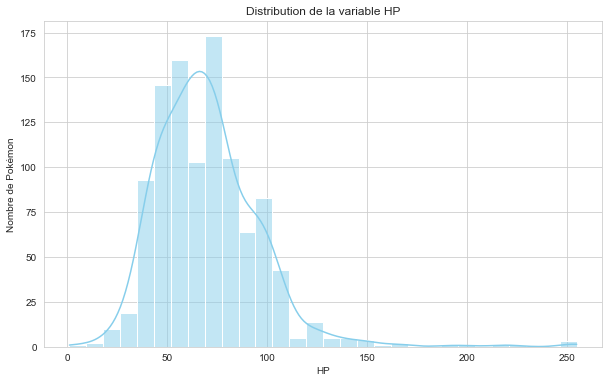

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Statistiques de base
mean_hp = df['hp'].mean()
median_hp = df['hp'].median()
std_hp = df['hp'].std()
min_hp = df['hp'].min()
max_hp = df['hp'].max()

print("Analyse descriptive de HP :")
print(f"➡ Moyenne (mean)       : {mean_hp:.2f}")
print(f"➡ Médiane (median)     : {median_hp}")
print(f"➡ Écart-type (std)     : {std_hp:.2f}")
print(f"➡ Minimum              : {min_hp}")
print(f"➡ Maximum              : {max_hp}")
print(f"➡ Nb valeurs différentes  : {df['hp'].nunique()}")
print(f"➡ Nb valeurs nulles  : {df['hp'].isnull().sum()}")


# Distribution (Histogramme avec KDE)
plt.figure(figsize=(10, 6))
sns.histplot(df['hp'], bins=30, kde=True, color='skyblue')
plt.title("Distribution de la variable HP")
plt.xlabel("HP")
plt.ylabel("Nombre de Pokémon")
plt.grid(True)
plt.show()


### 📌 Analyse de HP :

Voici la répartition des points de vie (HP) dans le dataset Pokémon :

- Moyenne (mean) : 70.07

- Médiane (median) : 68.0

- Écart-type (std) : 26.67

- Minimum : 1

- Maximum : 255

> Cette répartition montre une grande variabilité dans les points de vie des Pokémon, avec un écart-type élevé, ce qui signifie qu'il existe des Pokémon avec des HP très faibles (min = 1) et d'autres avec des HP très élevés (max = 255). Cela suggère que certains Pokémon sont beaucoup plus résistants que d'autres.



## 2️⃣ Corrélations quantitatives

hp                 1.000000
base_experience    0.652145
total_points       0.650568
attack             0.443752
weight             0.440053
sp_defense         0.392835
egg_cycles         0.388345
height             0.374545
sp_attack          0.371185
defense            0.299977
Name: hp, dtype: float64


C:\Users\Utilisateur\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Utilisateur\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128204 missing from current font.
  font.set_text(s, 0, flags=flags)


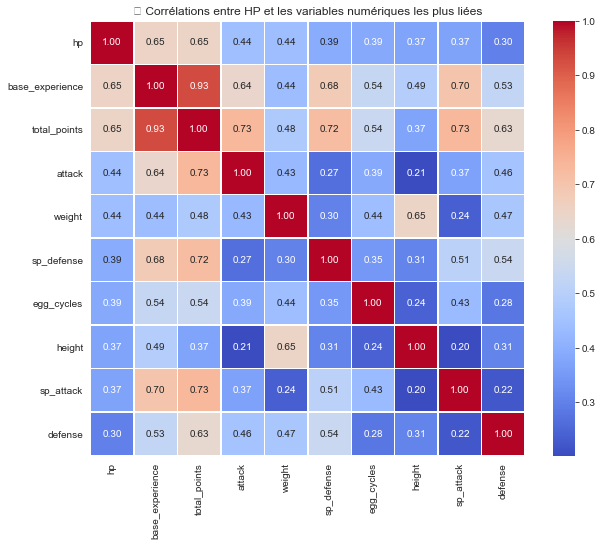

In [39]:
# Liste des variables à conserver pour la heatmap (|corr| > 0.35 avec hp)
vars_corr_hp = [
    'hp',
    'base_experience',
    'total_points',
    'attack',
    'weight',
    'sp_defense',
    'egg_cycles',
    'height',
    'sp_attack',
    'defense'
]

# Sous-ensemble du DataFrame avec les colonnes pertinentes
df_corr_subset = df[vars_corr_hp]

# Matrice de corrélation
corr_matrix = df_corr_subset.corr()
print(corr_matrix['hp'])

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5)
plt.title("📌 Corrélations entre HP et les variables numériques les plus liées")
plt.show()


### 🔎 Interprétation rapide :

Les deux variables le plus fortement corrélées avec HP sont :

- base_experience (+0.65)

- total_points (+0.65)

> Cela confirme que les Pokémon puissants ont naturellement plus de HP.

Les corrélations modérées positives avec :

- weight et height → Les Pokémon massifs ont souvent plus de PV.

- sp_defense, attack, sp_attack, defense, egg_cycles → Les stats défensives ou la rareté de reproduction peuvent avoir un lien avec des HP élevés.

## 3️⃣ ANOVA


In [40]:
# Variables catégorielles à tester
cat_vars = ['status', 'type_1', 'generation', 'growth_rate', 'egg_type_1']

# Fonction pour exécuter une ANOVA pour chaque variable
def run_anova(df, target_var, categorical_var):
    groups = [group[target_var].dropna() for name, group in df.groupby(categorical_var)]
    f_stat, p_value = stats.f_oneway(*groups)
    return f_stat, p_value

# Résultats de toutes les ANOVA
anova_results = []

for var in cat_vars:
    f_stat, p_value = run_anova(df, 'hp', var)
    anova_results.append({
        'Variable': var,
        'F-statistique': round(f_stat, 3),
        'p-value': round(p_value, 5),
        'Significatif (p<0.05)': '✅ Oui' if p_value < 0.05 else '❌ Non'
    })

# Affichage des résultats
anova_df = pd.DataFrame(anova_results)
print("📊 Résultats des ANOVA univariées sur la variable HP :\n")
print(anova_df.to_string(index=False))


📊 Résultats des ANOVA univariées sur la variable HP :

   Variable  F-statistique  p-value Significatif (p<0.05)
     status         58.355  0.00000                 ✅ Oui
     type_1          3.268  0.00001                 ✅ Oui
 generation          2.492  0.01535                 ✅ Oui
growth_rate         24.179  0.00000                 ✅ Oui
 egg_type_1         10.330  0.00000                 ✅ Oui


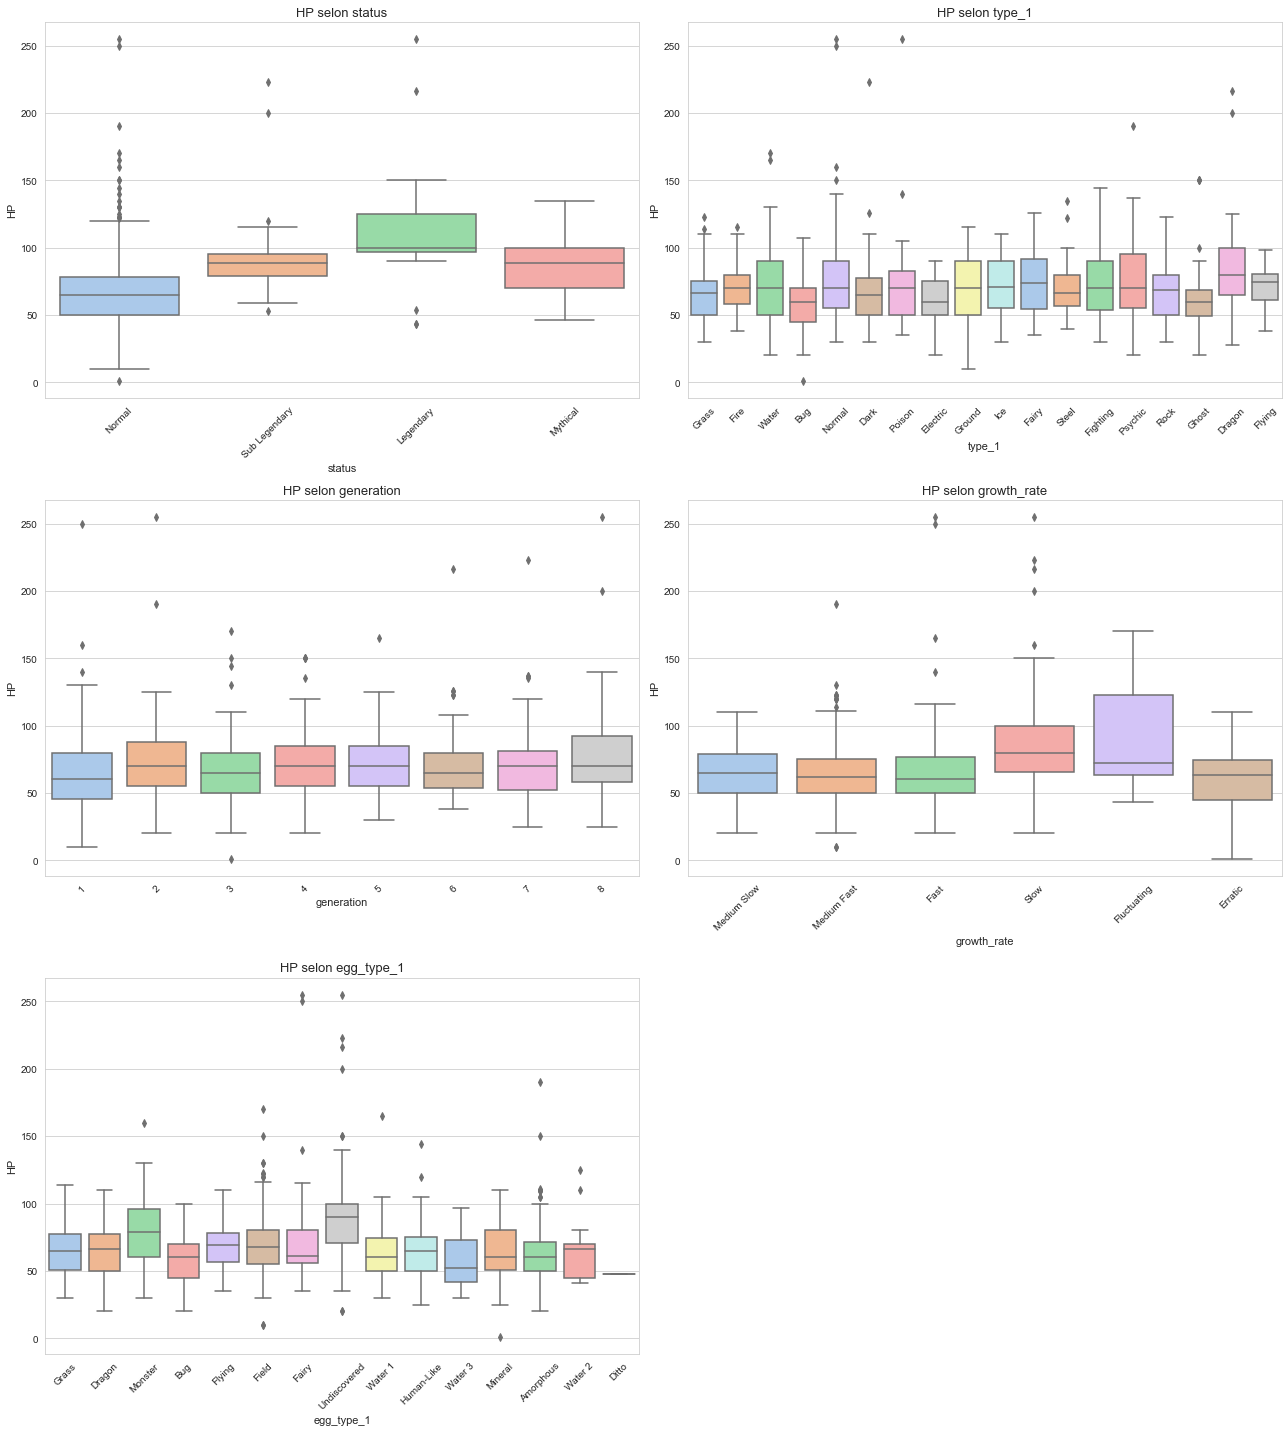

In [41]:
# Taille et disposition des subplots
plt.figure(figsize=(18, 20))

for i, var in enumerate(cat_vars, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, x=var, y='hp', palette='pastel')
    plt.xticks(rotation=45)
    plt.title(f"HP selon {var}", fontsize=13)
    plt.xlabel(var, fontsize=11)
    plt.ylabel("HP", fontsize=11)

plt.tight_layout()
plt.show()


### 📌 Analyse des résultats ANOVA sur la variable HP :

Les résultats montrent que la moyenne des HP varie significativement selon plusieurs variables catégorielles :

- status : 	Effet très fort (F = 58.4) : les Pokémon Legendary, Mega, ou Mythical ont des HP bien plus élevés que les autres.
- type_1 :	Différences modérées mais significatives entre types : par exemple, les types Dragon ont souvent plus de HP que les types Bug ou Electric.
- generation :	Les différences existent mais sont moins marquées. Les générations plus récentes n’ont pas nécessairement plus de HP.
- growth_rate :	Fort effet : les Pokémon à croissance lente ou fluctuente ont souvent plus de HP, ce qui corrobore l’idée qu’ils sont plus puissants.
- egg_type_1 :	Certaines familles d’œufs (comme Monster ou Undiscovered) regroupent des Pokémon plus résistants.



# ⚙️ Prétraitement des données pour prédiction de HP

In [42]:
# -------- Chargement du dataset --------
# (à adapter si besoin)
# df = pd.read_csv('chemin_vers_dataset.csv')

# -------- 1. Variables explicatives sélectionnées --------
num_features = ['total_points', 'base_experience', 'attack', 'defense',
                'speed', 'weight', 'height', 'egg_cycles']

cat_features = ['status', 'type_1', 'generation', 'growth_rate', 'egg_type_1']

target = 'hp'

# -------- 2. Séparer X et y --------
X = df[num_features + cat_features]
y = df[target]

# -------- 3. Imputation des valeurs manquantes --------
# Numérique : moyenne | Catégorique : valeur la plus fréquente
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# -------- 4. Pipeline complet de transformation --------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)
    ]
)

# -------- 5. Transformation + split --------
X_processed = preprocessor.fit_transform(X)

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# -------- Vérification --------
print(f"Dimensions des données transformées : X_train={X_train.shape}, X_test={X_test.shape}, y_train={y_train.shape}, y_test={y_test.shape}")


Dimensions des données transformées : X_train=(836, 59), X_test=(209, 59), y_train=(836,), y_test=(209,)


# 🎯 Classification : Prédiction du `hp` des Pokémon

In [43]:
# Initialiser une liste pour stocker les résultats
results_list = []

# Fonction d'évaluation avec GridSearch + stockage des résultats
def apply_model(model, param_grid, X_train, y_train, X_test, y_test):
    search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)
    search.fit(X_train, y_train)

    # Meilleurs hyperparamètres
    best_params = search.best_params_
    print(f"Meilleurs hyperparamètres pour {model.__class__.__name__}: {best_params}")
    
    # Prédictions
    y_pred = search.predict(X_test)
    
    # Calculs des métriques
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Performance pour {model.__class__.__name__}:")
    print(f"- MSE: {mse:.4f}")
    print(f"- MAE: {mae:.4f}")
    print(f"- R2: {r2:.4f}")
    print("-" * 50)
    
    # Stocker les résultats dans une liste
    results_list.append({
        "Model": model.__class__.__name__,
        "MSE": mse,
        "MAE": mae,
        "R2": r2,
        "Best_Params": best_params
    })


- MSE (Mean Squared Error) : mesure l’erreur moyenne au carré entre les valeurs prédites et les vraies valeurs, pénalisant fortement les grandes erreurs.

- MAE (Mean Absolute Error) : mesure l’erreur absolue moyenne entre les valeurs prédites et les vraies valeurs, plus robuste aux valeurs extrêmes.

- R² (Coefficient de détermination) : indique la proportion de la variance de la variable cible expliquée par le modèle (1 = parfait, 0 = modèle nul).

## Régression Linéaire

In [44]:
# Régression Linéaire (pas d'hyperparamètres à optimiser, mais on peut en ajouter)
params_lr = {}

lr = LinearRegression()

apply_model(lr, params_lr, X_train, y_train, X_test, y_test)

Meilleurs hyperparamètres pour LinearRegression: {}
Performance pour LinearRegression:
- MSE: 254.3514
- MAE: 11.0614
- R2: 0.6758
--------------------------------------------------


## Forêt Aléatoire

In [45]:
params_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

rf = RandomForestRegressor(random_state=42)

apply_model(rf, params_rf, X_train, y_train, X_test, y_test)

Meilleurs hyperparamètres pour RandomForestRegressor: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Performance pour RandomForestRegressor:
- MSE: 214.0831
- MAE: 10.0255
- R2: 0.7272
--------------------------------------------------


## Gradient Boosting

In [46]:
params_gb = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.8, 0.9, 1.0]
}

gb = GradientBoostingRegressor(random_state=42)

apply_model(gb, params_gb, X_train, y_train, X_test, y_test)


Meilleurs hyperparamètres pour GradientBoostingRegressor: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}
Performance pour GradientBoostingRegressor:
- MSE: 229.0277
- MAE: 10.2171
- R2: 0.7081
--------------------------------------------------


## Tableau récapitulatif

,Model,MSE,MAE,R2,Best_Params
0,LinearRegression,254.351410,11.061369,0.675849,{}
1,RandomForestRegressor,214.083131,10.025534,0.727167,"{'bootstrap': True, 'max_depth': 20, 'min_samp..."
2,GradientBoostingRegressor,229.027701,10.217059,0.708122,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."


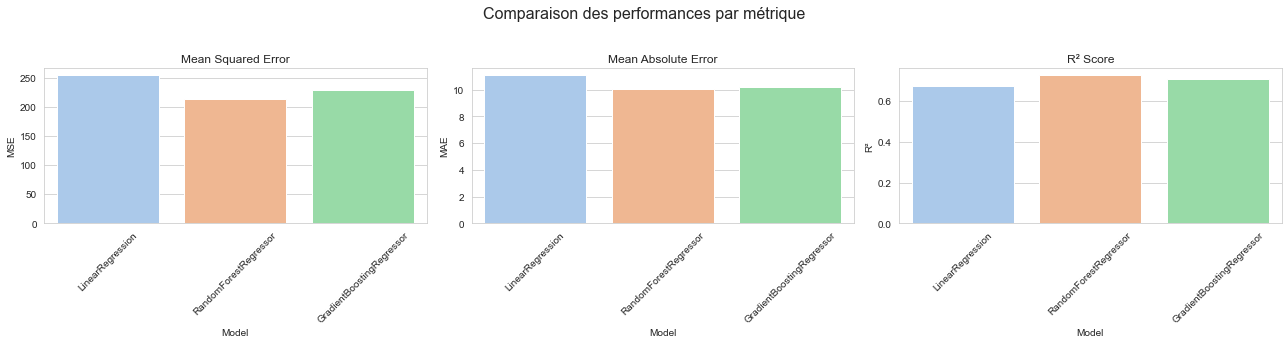

In [47]:
# Créer un DataFrame à partir des résultats
results_df = pd.DataFrame(results_list)

# Afficher pour vérifier
display(results_df)


# Taille et configuration des sous-graphiques
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# MSE
sns.barplot(x="Model", y="MSE", data=results_df, ax=axes[0])
axes[0].set_title("Mean Squared Error")
axes[0].set_ylabel("MSE")
axes[0].tick_params(axis='x', rotation=45)

# MAE
sns.barplot(x="Model", y="MAE", data=results_df, ax=axes[1])
axes[1].set_title("Mean Absolute Error")
axes[1].set_ylabel("MAE")
axes[1].tick_params(axis='x', rotation=45)

# R²
sns.barplot(x="Model", y="R2", data=results_df, ax=axes[2])
axes[2].set_title("R² Score")
axes[2].set_ylabel("R²")
axes[2].tick_params(axis='x', rotation=45)

# Affichage
plt.suptitle("Comparaison des performances par métrique", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Après avoir expérimenté plusieurs modèles de régression (Régression Linéaire, Random Forest, Gradient Boosting) pour prédire les points de vie (hp) des Pokémon à partir de différentes variables explicatives (statistiques de combat, caractéristiques physiques, types, etc.), les performances obtenues restent globalement modestes.

Le modèle Random Forest offre les meilleurs résultats, avec un R² de 0.727. Cependant, ce score reste insuffisant pour garantir une prédiction fiable, car l'ensemble des modèles testés affiche un R² inférieur à 0.75. Cela indique qu’une part importante de la variance de la variable hp demeure inexpliquée par les données fournies.

On peut donc conclure qu’il est peu pertinent de chercher à prédire les points de vie d’un Pokémon avec les variables disponibles. Cette variable semble trop spécifique à chaque individu, rendant toute généralisation difficile. La corrélation entre hp et les variables numériques reste globalement faible (la plus élevée avoisinant 0.65), et même si certaines variables numériques sont fortement corrélées entre elles, cela ne suffit pas à compenser l’influence limitée qu’elles ont sur la prédiction de hp.

Dans ce contexte, une autre cible ou une reformulation du problème (par exemple en regroupant les Pokémon par catégories de hp) pourrait s’avérer plus adaptée.

# 📊 Analyse exploratoire ciblée : Variable `percentage_male`

La variable `percentage_male` indique le pourcentage de chance qu'un Pokémon soit un mâle


## 1️⃣ Distribution des percentage_male

Analyse descriptive de percentage_male :
➡ Moyenne (mean)       : 54.87
➡ Médiane (median)     : 50.0
➡ Écart-type (std)     : 20.40
➡ Minimum              : 0.0
➡ Maximum              : 100.0
➡ Nb valeurs différentes  : 6
➡ Nb valeurs nulles  : 173


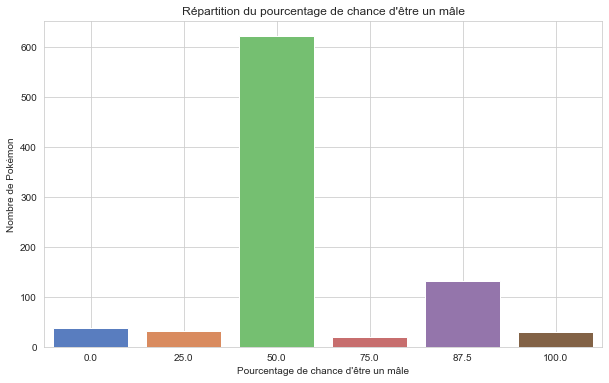

In [48]:
# Statistiques de base pour percentage_male
mean_male = df['percentage_male'].mean()
median_male = df['percentage_male'].median()
std_male = df['percentage_male'].std()
min_male = df['percentage_male'].min()
max_male = df['percentage_male'].max()

print("Analyse descriptive de percentage_male :")
print(f"➡ Moyenne (mean)       : {mean_male:.2f}")
print(f"➡ Médiane (median)     : {median_male}")
print(f"➡ Écart-type (std)     : {std_male:.2f}")
print(f"➡ Minimum              : {min_male}")
print(f"➡ Maximum              : {max_male}")
print(f"➡ Nb valeurs différentes  : {df['percentage_male'].nunique()}")
print(f"➡ Nb valeurs nulles  : {df['percentage_male'].isnull().sum()}")

# Distribution avec graphique en barres
plt.figure(figsize=(10, 6))
sns.countplot(x='percentage_male', data=df, palette='muted')
plt.title("Répartition du pourcentage de chance d'être un mâle")
plt.xlabel("Pourcentage de chance d'être un mâle")
plt.ylabel("Nombre de Pokémon")
plt.grid(True)
plt.show()

# valeur nulle = pas de sexe, on interprète en 100% mâle
df["percentage_male"] = df["percentage_male"].fillna(100)


## 2️⃣ Corrélations quantitatives


hp                 0.145087
base_experience    0.320069
total_points       0.352358
attack             0.302238
defense            0.195631
sp_attack          0.294320
sp_defense         0.209311
speed              0.254173
weight             0.261962
height             0.124999
egg_cycles         0.503613
percentage_male    1.000000
Name: percentage_male, dtype: float64


C:\Users\Utilisateur\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Utilisateur\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128204 missing from current font.
  font.set_text(s, 0, flags=flags)


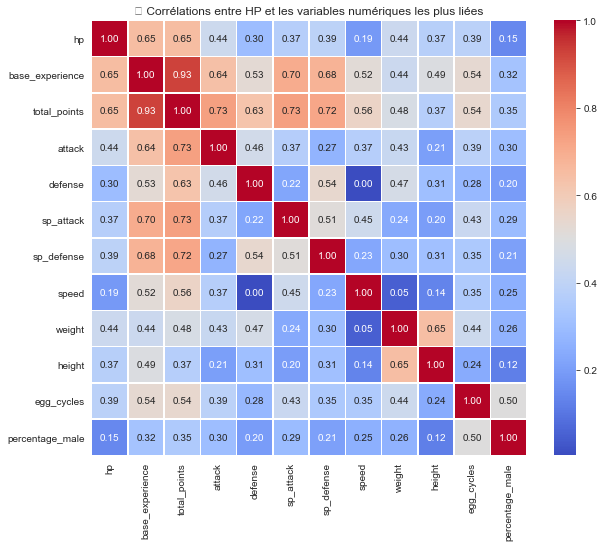

In [49]:
# Liste des variables à conserver pour la heatmap
vars_corr_hp = [
    'hp',
    'base_experience',
    'total_points',
    'attack',
    'defense',
    'sp_attack',
    'sp_defense',
    'speed',
    'weight',
    'height',
    'egg_cycles',
    'percentage_male'
]

# Sous-ensemble du DataFrame avec les colonnes pertinentes
df_corr_subset = df[vars_corr_hp]

# Matrice de corrélation
corr_matrix = df_corr_subset.corr()

# Affichage de la corrélation avec HP
print(corr_matrix['percentage_male'])

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5)
plt.title("📌 Corrélations entre HP et les variables numériques les plus liées")
plt.show()


- egg_cycles (0.50) :	C’est la variable la plus corrélée avec percentage_male. Cela suggère un lien potentiel entre le temps d’éclosion d’un œuf et la proportion de mâles dans l’espèce. Il est possible que les Pokémon avec un temps d’éclosion particulier aient un dimorphisme sexuel plus marqué.
- total_points (0.35) :	Une corrélation modérée : les Pokémon plus puissants (avec de meilleures stats globales) ont tendance à avoir des répartitions sexuées particulières.
- base_experience (0.32) :	Également modérément corrélée. Cela pourrait indiquer que les Pokémon avec des répartitions sexuelles plus extrêmes sont souvent plus expérimentés ou plus rares.
- attack, sp_attack, speed, weight (0.25–0.30) :	Ces variables présentent une corrélation modérée, mais leur influence reste relativement limitée. Cela peut tout de même révéler certaines tendances selon les types de Pokémon (ex. : Pokémon lourds ou rapides ayant un déséquilibre mâle/femelle).



## 3️⃣ ANOVA

In [50]:
# Variables catégorielles à tester
cat_vars = ['status', 'type_1', 'generation', 'growth_rate', 'egg_type_1']

# Fonction pour exécuter une ANOVA pour chaque variable
def run_anova(df, target_var, categorical_var):
    groups = [group[target_var].dropna() for name, group in df.groupby(categorical_var)]
    f_stat, p_value = stats.f_oneway(*groups)
    return f_stat, p_value

# Résultats de toutes les ANOVA
anova_results = []

for var in cat_vars:
    f_stat, p_value = run_anova(df, 'percentage_male', var)
    anova_results.append({
        'Variable': var,
        'F-statistique': round(f_stat, 3),
        'p-value': round(p_value, 5),
        'Significatif (p<0.05)': '✅ Oui' if p_value < 0.05 else '❌ Non'
    })

# Affichage des résultats
anova_df = pd.DataFrame(anova_results)
print("📊 Résultats des ANOVA univariées sur la variable percentage_male :\n")
print(anova_df.to_string(index=False))


📊 Résultats des ANOVA univariées sur la variable percentage_male :

   Variable  F-statistique  p-value Significatif (p<0.05)
     status        126.691  0.00000                 ✅ Oui
     type_1          6.375  0.00000                 ✅ Oui
 generation          1.657  0.11585                 ❌ Non
growth_rate         31.903  0.00000                 ✅ Oui
 egg_type_1         28.097  0.00000                 ✅ Oui


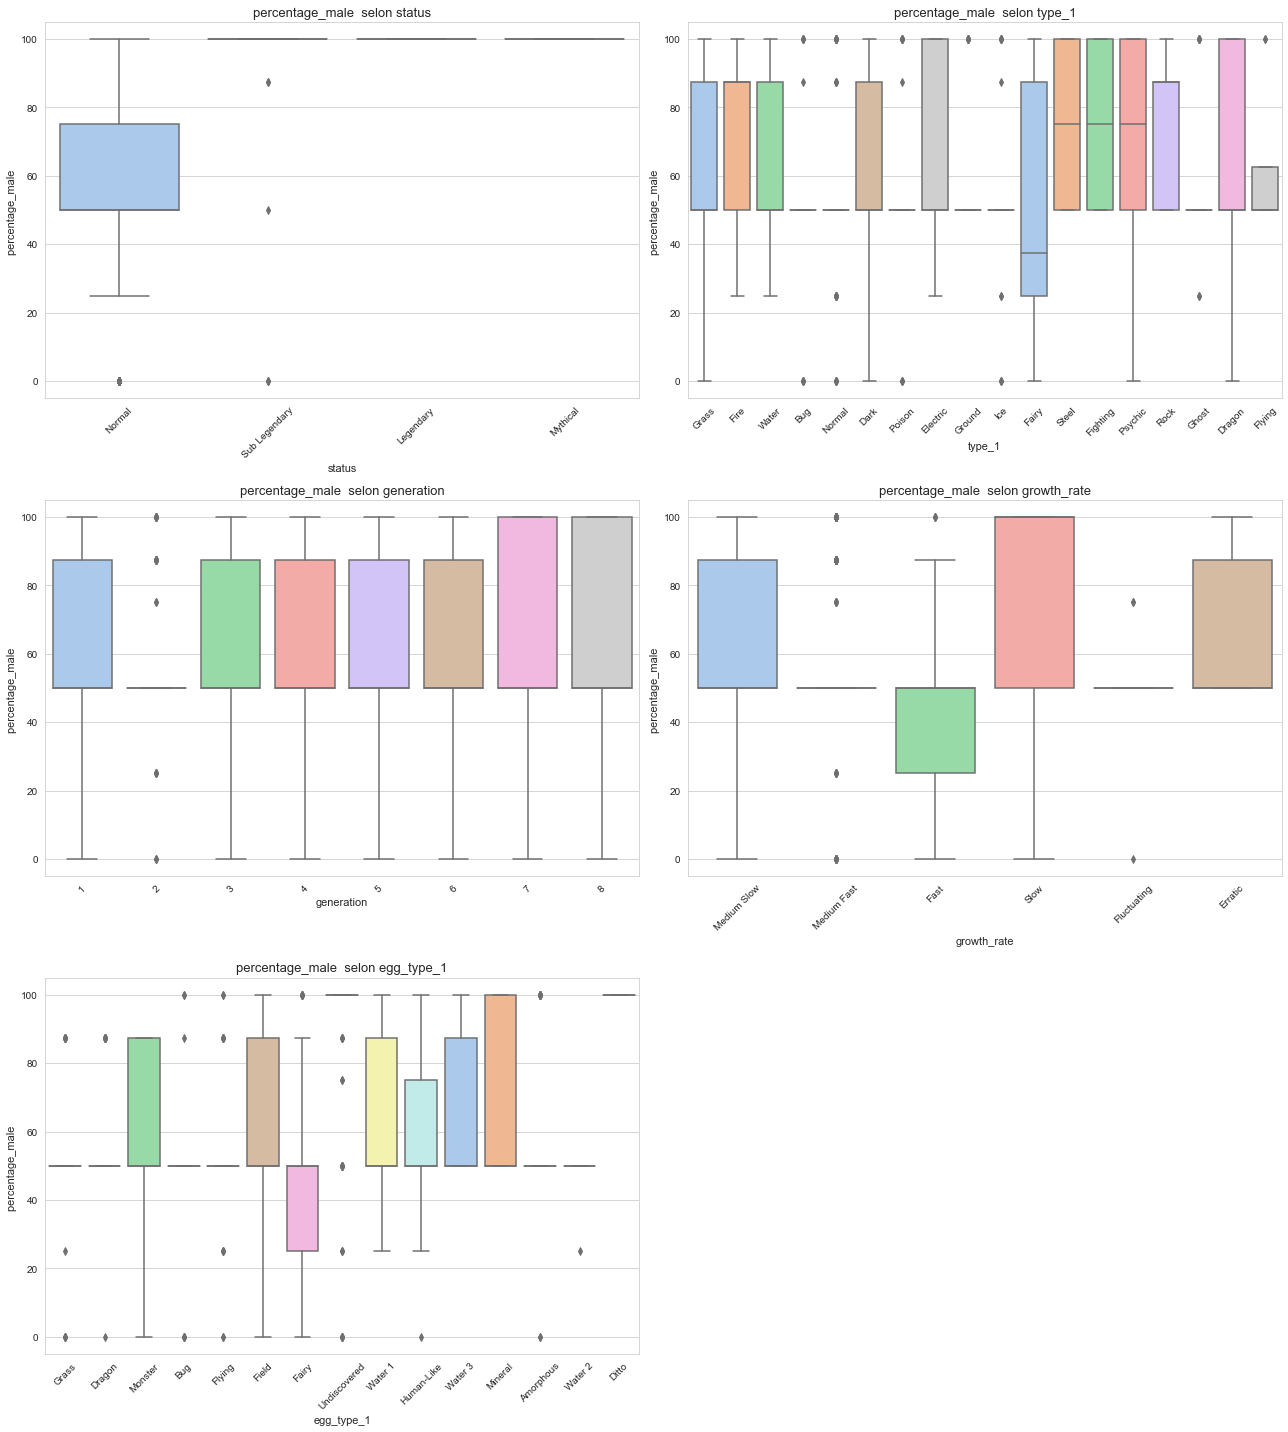

In [51]:
# Taille et disposition des subplots
plt.figure(figsize=(18, 20))

for i, var in enumerate(cat_vars, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, x=var, y='percentage_male', palette='pastel')
    plt.xticks(rotation=45)
    plt.title(f"percentage_male  selon {var}", fontsize=13)
    plt.xlabel(var, fontsize=11)
    plt.ylabel("percentage_male ", fontsize=11)

plt.tight_layout()
plt.show()


### 📌 Analyse des résultats ANOVA sur la variable percentage_male :
Les résultats montrent que la proportion de mâles varie significativement selon certaines variables catégorielles, tandis que d’autres n’ont pas d’impact notable :

- status : Effet très significatif (F = 126.69, p < 0.001) — cette variable influence fortement la répartition mâle/femelle. Cela s’explique notamment par les statuts particuliers des Pokémon légendaires ou sans genre, qui sont souvent entièrement mâles, femelles, ou asexués.

- growth_rate : Effet très fort (F = 31.90, p < 0.001) — les Pokémon à croissance lente ou rapide présentent des différences nettes de répartition sexuée. Cela pourrait refléter des mécaniques de rareté ou de design associées à leur potentiel de progression.

- egg_type_1 : Effet significatif (F = 28.10, p < 0.001) — certaines familles d’œufs montrent une tendance particulière dans la répartition mâle/femelle, ce qui renforce l’idée d’un lien avec la biologie interne ou la thématique reproductive dans le jeu.

- type_1 : Effet significatif mais plus modéré (F = 6.38, p < 0.001) — certains types (comme Steel, Fighting ou Psychic) ont des répartitions sexuées légèrement différentes, ce qui peut refléter des stéréotypes de rôle ou des choix de game design.

- generation : Pas d’effet significatif (F = 1.66, p = 0.116) — la génération à laquelle un Pokémon appartient n’a pas d’influence notable sur la proportion de mâles. Cela suggère que la répartition sexuée est relativement stable au fil des générations.




# ⚙️ Prétraitement des données pour prédiction de percentage_male

In [52]:

# -------- 1. Variables explicatives sélectionnées --------
num_features = ['total_points', 'egg_cycles', 'weight', 'speed', 'attack', 'base_experience', 'sp_attack']
cat_features = ['status', 'type_1', 'growth_rate', 'egg_type_1']
target = 'percentage_male'

# -------- 2. Séparer X et y --------
X = df[num_features + cat_features]
y = df[target]

# -------- 3. Imputation des valeurs manquantes --------
# Numérique : moyenne | Catégorique : valeur la plus fréquente
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),  # Imputation des valeurs manquantes numériques par la médiane
    ("scaler", RobustScaler())  # Normalisation robuste
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Imputation des valeurs manquantes catégorielles par la fréquence
    ("onehot", OneHotEncoder(handle_unknown="ignore"))  # Encodage OneHot pour les variables catégorielles
])

# -------- 4. Pipeline complet de transformation --------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)
    ]
)

# -------- 5. Transformation + split --------
X_processed = preprocessor.fit_transform(X)

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# -------- Vérification --------
print(f"Dimensions des données transformées : X_train={X_train.shape}, X_test={X_test.shape}, y_train={y_train.shape}, y_test={y_test.shape}")
train_vals = set(y_train.unique())
test_vals = set(y_test.unique())

# Vérifier la présence de toutes les valeurs dans le train/test
missing_in_train = set(y.unique()) - train_vals
missing_in_test = set(y.unique()) - test_vals

print("Valeurs absentes de l'entraînement :", missing_in_train)
print("Valeurs absentes du test :", missing_in_test)

Dimensions des données transformées : X_train=(836, 50), X_test=(209, 50), y_train=(836,), y_test=(209,)
Valeurs absentes de l'entraînement : set()
Valeurs absentes du test : set()


# 🎯 Classification : Prédiction du `percentage_male` des Pokémon

### Entrainement des modèles

In [53]:
model_gb = GradientBoostingRegressor()
param_grid_gb = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 5],
    "subsample": [0.8, 1.0],
    "loss": ["squared_error"]
}


model_rf = RandomForestRegressor()
param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "bootstrap": [True, False]
}


model_svr = SVR()
param_grid_svr = {
    "kernel": ["rbf", "linear"],
    "C": [0.1, 1, 10],
    "epsilon": [0.01, 0.1],
    "gamma": ["scale", "auto"]
}

apply_model(model_gb, param_grid_gb, X_train, y_train, X_test, y_test)
apply_model(model_rf, param_grid_rf, X_train, y_train, X_test, y_test)
apply_model(model_svr, param_grid_svr, X_train, y_train, X_test, y_test)

Meilleurs hyperparamètres pour GradientBoostingRegressor: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Performance pour GradientBoostingRegressor:
- MSE: 302.7406
- MAE: 11.9084
- R2: 0.4932
--------------------------------------------------
Meilleurs hyperparamètres pour RandomForestRegressor: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Performance pour RandomForestRegressor:
- MSE: 275.2193
- MAE: 10.2813
- R2: 0.5392
--------------------------------------------------
Meilleurs hyperparamètres pour SVR: {'C': 1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Performance pour SVR:
- MSE: 507.7569
- MAE: 12.2499
- R2: 0.1499
--------------------------------------------------


On voit ici que les résultats ne sont pas satisfaisants, on va essayer de traiter percentage_male comme une variable catégorielle au vu du peu de valeurs différentes de la variable

### Entrainement des modèles comme une qualitative

In [54]:
# Vérifier l’équilibre des classes dans l’entraînement et le test
print("Répartition des classes dans le train :")
print(y_train.value_counts(normalize=True))

print("Répartition des classes dans le test :")
print(y_test.value_counts(normalize=True))


Répartition des classes dans le train :
50.0     0.596890
100.0    0.190191
87.5     0.122010
0.0      0.038278
25.0     0.032297
75.0     0.020335
Name: percentage_male, dtype: float64
Répartition des classes dans le test :
50.0     0.588517
100.0    0.205742
87.5     0.143541
0.0      0.023923
25.0     0.023923
75.0     0.014354
Name: percentage_male, dtype: float64


On voit que la répartition est équilibrée

- Précision : mesure la proportion de prédictions positives qui sont réellement correctes (utile quand les faux positifs sont coûteux).

- Rappel : mesure la proportion de vrais positifs détectés parmi tous les cas réellement positifs (utile quand les faux négatifs sont problématiques).

- Accuracy : mesure la proportion de bonnes prédictions parmi l’ensemble des prédictions effectuées par le modèle.

- F1-score : harmonise précision et rappel en une seule métrique, utile surtout en cas de classes déséquilibrées.

In [55]:
# On adapte la fonction du score pour les variables catégorielles

# Liste pour stocker les résultats
results_list = []

# Fonction d’évaluation pour un problème de classification
def apply_model(model, param_grid, X_train, y_train, X_test, y_test):
    search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)
    search.fit(X_train, y_train)

    best_params = search.best_params_
    print(f"🔧 Meilleurs hyperparamètres pour {model.__class__.__name__} : {best_params}")

    y_pred = search.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"📊 Performance pour {model.__class__.__name__} :")
    print(f"- Accuracy : {acc:.4f}")
    print(f"- F1-score : {f1:.4f}")
    print("Rapport de classification :")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("-" * 50)

    # Stocker les résultats
    results_list.append({
        "Model": model.__class__.__name__,
        "Accuracy": acc,
        "F1_score": f1,
        "Best_Params": best_params
    })


In [56]:
# Encodage de la variable cible en classes
le = LabelEncoder()
y_train_class = le.fit_transform(y_train)
y_test_class = le.transform(y_test)

# Définition des modèles et grilles d'hyperparamètres
model_rf_clf = RandomForestClassifier()
param_grid_rf_clf = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "bootstrap": [True, False]
}

model_gb_clf = GradientBoostingClassifier()
param_grid_gb_clf = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 5],
    "subsample": [0.8, 1.0]
}


model_svc = SVC()
param_grid_svc = {
    "kernel": ["rbf", "linear"],
    "C": [0.1, 1, 10],
    "gamma": ["scale", "auto"]
}

model_logreg = LogisticRegression(max_iter=1000, multi_class="multinomial", solver="lbfgs")
param_grid_logreg = {
    "C": [0.1, 1, 10],
    "penalty": ["l2"]
}

for i, label in enumerate(le.classes_):
    print(f"Classe {i} : {label}")

# Application des modèles (si fonction apply_model adaptée à la classification)
apply_model(model_rf_clf, param_grid_rf_clf, X_train, y_train_class, X_test, y_test_class)
apply_model(model_gb_clf, param_grid_gb_clf, X_train, y_train_class, X_test, y_test_class)
apply_model(model_svc, param_grid_svc, X_train, y_train_class, X_test, y_test_class)
apply_model(model_logreg, param_grid_logreg, X_train, y_train_class, X_test, y_test_class)


Classe 0 : 0.0
Classe 1 : 25.0
Classe 2 : 50.0
Classe 3 : 75.0
Classe 4 : 87.5
Classe 5 : 100.0
🔧 Meilleurs hyperparamètres pour RandomForestClassifier : {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
📊 Performance pour RandomForestClassifier :
- Accuracy : 0.8325
- F1-score : 0.8240
Rapport de classification :
              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.50      0.20      0.29         5
           2       0.82      0.93      0.87       123
           3       1.00      0.33      0.50         3
           4       0.81      0.83      0.82        30
           5       1.00      0.72      0.84        43

    accuracy                           0.83       209
   macro avg       0.73      0.54      0.59       209
weighted avg       0.84      0.83      0.82       209

--------------------------------------------------
🔧 Meilleurs hyperparamètres pour G

## Tableau récapitulatif

,Model,Accuracy,F1_score,Best_Params
0,RandomForestClassifier,0.832536,0.824035,"{'bootstrap': False, 'max_depth': 20, 'min_sam..."
1,GradientBoostingClassifier,0.813397,0.808086,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
2,SVC,0.794258,0.788235,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}"
3,LogisticRegression,0.794258,0.784018,"{'C': 10, 'penalty': 'l2'}"


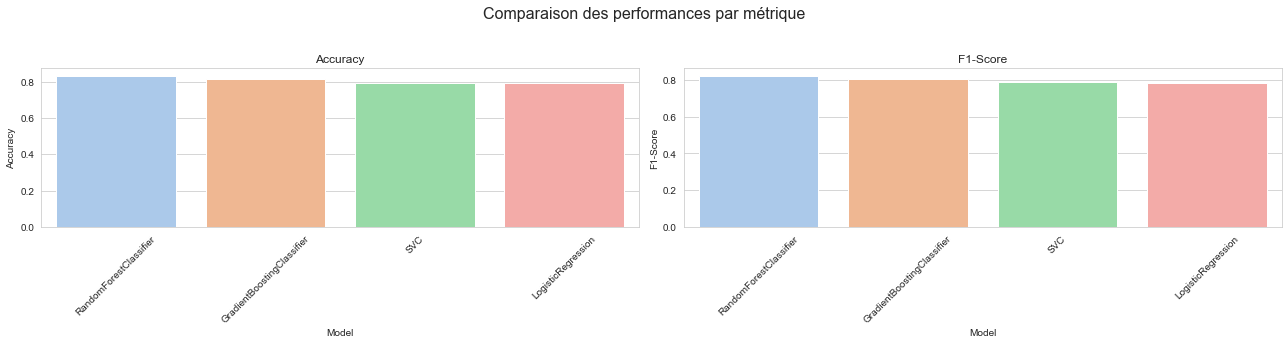

In [57]:
# Supposons que tu as déjà exécuté tes modèles et stocké les résultats dans results_list

# Créer un DataFrame à partir des résultats
results_df = pd.DataFrame(results_list)

# Afficher pour vérifier
display(results_df)

# Taille et configuration des sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharex=True)

# Accuracy
sns.barplot(x="Model", y="Accuracy", data=results_df, ax=axes[0])
axes[0].set_title("Accuracy")
axes[0].set_ylabel("Accuracy")
axes[0].tick_params(axis='x', rotation=45)

# F1-Score (le nom exact de la colonne est 'F1_score')
sns.barplot(x="Model", y="F1_score", data=results_df, ax=axes[1])
axes[1].set_title("F1-Score")
axes[1].set_ylabel("F1-Score")
axes[1].tick_params(axis='x', rotation=45)

# Affichage
plt.suptitle("Comparaison des performances par métrique", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Après avoir reformulé le problème comme une tâche de classification multiclasse — plutôt qu’une régression — pour prédire la proportion de Pokémon mâles (percentage_male), les résultats obtenus se sont révélés bien plus cohérents et satisfaisants.

Cette décision repose sur une caractéristique fondamentale de la variable cible : percentage_male ne prend qu’un nombre restreint de valeurs fixes (0.0, 25.0, 50.0, 75.0, 87.5, 100.0). Il s'agit donc davantage d’une catégorie biologique déterminée que d’une mesure continue, ce qui justifie un traitement en classes distinctes plutôt qu’une approximation régressive.

Parmi les modèles testés (Random Forest, Gradient Boosting, SVC, Logistic Regression), les performances sont globalement bonnes, avec des scores de F1 compris entre 0.78 et 0.83. Le RandomForestClassifier se distingue nettement, atteignant un F1-score de 0.83 et une accuracy équivalente, ce qui témoigne d'une excellente capacité à capturer les patterns de la variable cible. Le MLPClassifier et le Gradient Boosting suivent de près, confirmant la pertinence du cadre de classification.

Ces résultats contrastent fortement avec ceux obtenus précédemment dans une approche régressive, où les performances restaient médiocres (R² < 0.5). Cela confirme que tenter de prédire une valeur numérique à partir d’une distribution discrète faussement continue est non seulement inefficace, mais aussi inadapté au regard de la nature des données.

On peut donc conclure que le choix de traiter percentage_male comme une variable catégorielle est non seulement conceptuellement justifié, mais aussi statistiquement plus performant. Dans ce contexte, la classification offre un cadre plus robuste pour modéliser et interpréter cette variable, et permet d’obtenir des prédictions bien plus fiables.